# Image classification with deep neural networks 

In this project, we will  explore the effectiveness of deep, feedforward neural networks at classifying images representing handwritten digits. We will use a dataset pre-loaded with the `sklearn.datasets` library.

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
digits = load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [2]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [3]:
# Each image has 64 pixels = 8 * 8 pixels
np.sqrt(64)


8.0

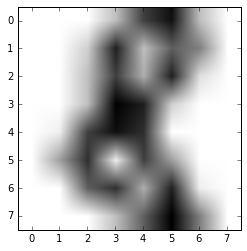

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

first_image = df.sample(axis=0,n=1).values.reshape(8,8)
plt.imshow(first_image, cmap='gray_r')

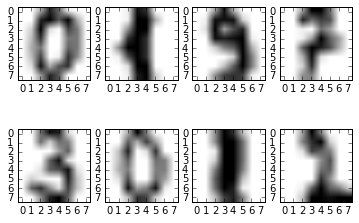

In [5]:
fig, axes = plt.subplots(2, 4)

axes[0, 0].imshow(df.iloc[0].values.reshape(8,8), cmap='gray_r')
axes[0, 1].imshow(df.iloc[99].values.reshape(8,8), cmap='gray_r')
axes[0, 2].imshow(df.iloc[199].values.reshape(8,8), cmap='gray_r')
axes[0, 3].imshow(df.iloc[299].values.reshape(8,8), cmap='gray_r')

axes[1, 0].imshow(df.iloc[999].values.reshape(8,8), cmap='gray_r')
axes[1, 1].imshow(df.iloc[1099].values.reshape(8,8), cmap='gray_r')
axes[1, 2].imshow(df.iloc[1199].values.reshape(8,8), cmap='gray_r')
axes[1, 3].imshow(df.iloc[1299].values.reshape(8,8), cmap='gray_r')

## K-nearest neighbors models


In [6]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

df['target'] = digits.target
train_df=df.sample(frac=0.75,random_state=1) 
test_df=df.drop(train_df.index)

def train(train_df,k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit( train_df.drop(['target'],axis=1) , train_df['target']  )
    return model

def test(train_df,test_df,k):
    model = train(train_df,k)
    predictions = model.predict(test_df.drop(['target'],axis=1) )
    acc = accuracy_score(test_df['target'],predictions)
    return acc

test(train_df,test_df,1)

0.977728285077951

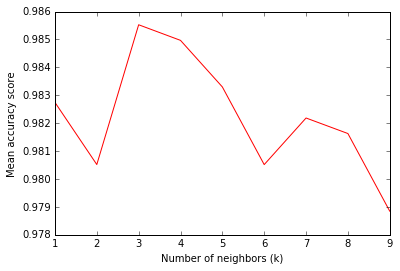

In [7]:
from sklearn.model_selection import KFold
kfold = KFold(4, True, 1)

mean_accuracy_scores = []
for k in list(range(1, 10)):
    accuracy_scores = []
    for train_indexes, test_indexes in kfold.split(df):
        acc = test(df.iloc[train_indexes], df.iloc[test_indexes],k)
        accuracy_scores.append(acc)
        mean_accuracy_score = np.mean(accuracy_scores)
    mean_accuracy_scores.append(mean_accuracy_score)

plt.plot(list(range(1, 10)),mean_accuracy_scores,color="red")
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Mean accuracy score')
plt.show()

## Neural network models

Since k-nearest neighbors models require high memory usage and there's no model representation to debug and explore, we'll try a few neural network models, starting with a single hidden layer.

In [8]:
from sklearn.neural_network import MLPClassifier

def train(train_df,n_neurons):
    model = MLPClassifier(hidden_layer_sizes=(n_neurons, ))
    model.fit( train_df.drop(['target'],axis=1) , train_df['target']  )
    return model

def test(train_df,test_df,n_neurons):
    model = train(train_df,n_neurons)
    predictions = model.predict(test_df.drop(['target'],axis=1) )
    acc = accuracy_score(test_df['target'],predictions)
    return acc

test(train_df,test_df,8)

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



0.89086859688196

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



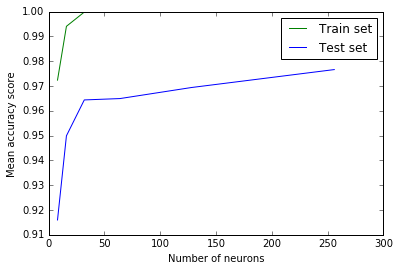

In [9]:
kfold = KFold(4, True, 1)

mean_accuracy_scores_train = []
mean_accuracy_scores_test = []
for n_neurons in [8,16,32,64,128,256]:
    accuracy_scores_train = []
    accuracy_scores_test = []
    for train_indexes, test_indexes in kfold.split(df):
        acc = test(df.iloc[train_indexes], df.iloc[train_indexes],n_neurons)
        accuracy_scores_train.append(acc)
        acc = test(df.iloc[train_indexes], df.iloc[test_indexes],n_neurons)
        accuracy_scores_test.append(acc)
        mean_accuracy_score_train = np.mean(accuracy_scores_train)
        mean_accuracy_score_test = np.mean(accuracy_scores_test)
    mean_accuracy_scores_train.append(mean_accuracy_score_train)
    mean_accuracy_scores_test.append(mean_accuracy_score_test)

plt.plot([8,16,32,64,128,256],mean_accuracy_scores_train,color="green",label = "Train set")
plt.plot([8,16,32,64,128,256],mean_accuracy_scores_test,color="blue",label = "Test set")
plt.xlabel('Number of neurons')
plt.ylabel('Mean accuracy score')
plt.legend()
plt.show()

Adding more neurons to a single hidden layer vastly improved the classification accuracy. Noteworthy, the models perform better on the train set than on the test set, which may indicate overfitting.

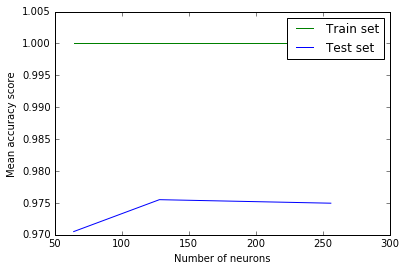

In [13]:
def train(train_df,n_neurons):
    model = MLPClassifier(hidden_layer_sizes=(n_neurons,n_neurons ))
    model.fit( train_df.drop(['target'],axis=1) , train_df['target']  )
    return model

def test(train_df,test_df,n_neurons):
    model = train(train_df,n_neurons)
    predictions = model.predict(test_df.drop(['target'],axis=1) )
    acc = accuracy_score(test_df['target'],predictions)
    return acc

kfold = KFold(4, True, 1)

mean_accuracy_scores_train = []
mean_accuracy_scores_test = []

for n_neurons in [64,128,256]:
    accuracy_scores_train = []
    accuracy_scores_test = []
    for train_indexes, test_indexes in kfold.split(df):
        acc = test(df.iloc[train_indexes], df.iloc[train_indexes],n_neurons)
        accuracy_scores_train.append(acc)
        acc = test(df.iloc[train_indexes], df.iloc[test_indexes],n_neurons)
        accuracy_scores_test.append(acc)
        mean_accuracy_score_train = np.mean(accuracy_scores_train)
        mean_accuracy_score_test = np.mean(accuracy_scores_test)
    mean_accuracy_scores_train.append(mean_accuracy_score_train)
    mean_accuracy_scores_test.append(mean_accuracy_score_test)

plt.plot([64,128,256],mean_accuracy_scores_train,color="green",label = "Train set")
plt.plot([64,128,256],mean_accuracy_scores_test,color="blue",label = "Test set")
plt.xlabel('Number of neurons')
plt.ylabel('Mean accuracy score')
plt.legend()
plt.show()

Models with 2 hidden layers perform similary to those with 1 hidden layer.

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



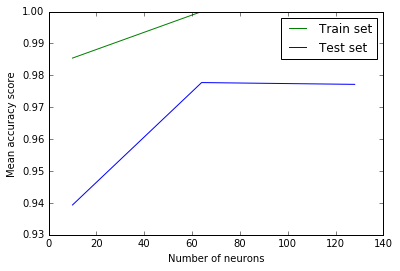

In [14]:
def train(train_df,n_neurons):
    model = MLPClassifier(hidden_layer_sizes=(n_neurons,n_neurons,n_neurons ))
    model.fit( train_df.drop(['target'],axis=1) , train_df['target']  )
    return model

def test(train_df,test_df,n_neurons):
    model = train(train_df,n_neurons)
    predictions = model.predict(test_df.drop(['target'],axis=1) )
    acc = accuracy_score(test_df['target'],predictions)
    return acc

kfold = KFold(6, True, 1)

mean_accuracy_scores_train = []
mean_accuracy_scores_test = []

for n_neurons in [10,64,128]:
    accuracy_scores_train = []
    accuracy_scores_test = []
    for train_indexes, test_indexes in kfold.split(df):
        acc = test(df.iloc[train_indexes], df.iloc[train_indexes],n_neurons)
        accuracy_scores_train.append(acc)
        acc = test(df.iloc[train_indexes], df.iloc[test_indexes],n_neurons)
        accuracy_scores_test.append(acc)
        mean_accuracy_score_train = np.mean(accuracy_scores_train)
        mean_accuracy_score_test = np.mean(accuracy_scores_test)
    mean_accuracy_scores_train.append(mean_accuracy_score_train)
    mean_accuracy_scores_test.append(mean_accuracy_score_test)

plt.plot([10,64,128],mean_accuracy_scores_train,color="green",label = "Train set")
plt.plot([10,64,128],mean_accuracy_scores_test,color="blue",label = "Test set")
plt.xlabel('Number of neurons')
plt.ylabel('Mean accuracy score')
plt.legend()
plt.show()

Using 3 hidden layers, each with either 64 or 128 neurons, seems to be the best in terms of accuracy and overfitting (less difference between the train set and the test set). Overall, having more layers and more neurons tends to improve the network's performance.